In [2]:
import yfinance as yf
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import datetime
from datetime import timedelta, date
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from statistics import mean, stdev
import plotly.express as px
import webbrowser
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from NotifyMe import Notifier
webbrowser.register('chrome', None, webbrowser.BackgroundBrowser('C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe'))

In [3]:
#Set up notification system FOR MY USE ONLY
N = Notifier()

In [4]:
symbols = ['ACB', 'F', 'GE', 'DIS', 'AAL', 'GPRO', 'DAL', 'MSFT', 'CCL', 'AAPL', 'FIT', 'SNAP', 'PLUG', 'BAC', 'BA', 'NCLH', 'INO', 'UAL', 'UBER', 'CGC', 'TSLA', 'AMD', 'CRON', 'RCL', 'TWTR', 'GRPN', 'FB', 'SBUX', 'MRO', 'ZNGA', 'BABA', 'T', 'KO', 'APHA', 'USO', 'XOM', 'AMZN', 'MFA', 'JBLU', 'NIO', 'MRNA', 'LUV', 'GM', 'GILD', 'MGM', 'SAVE', 'NFLX', 'NRZ', 'SPCE', 'LK', 'VSLR', 'AMC', 'PENN', 'VOO', 'TLRY', 'HAL', 'NOK', 'NVDA', 'CPRX', 'LYFT', 'SQ', 'SPY', 'V', 'NKE', 'SIRI', 'UCO', 'WORK', 'CPE', 'BYND', 'KOS', 'ET', 'OXY', 'PFE', 'ZM', 'CRBP', 'SPHD', 'FCEL', 'VKTX', 'JPM', 'NTDOY', 'NYMT', 'BP', 'ATVI', 'CSCO', 'WFC', 'WMT', 'GOOGL', 'INTC', 'GLUU', 'AUY', 'VTI', 'ERI', 'TXMD', 'SNE', 'PTON', 'ROKU', 'JNJ', 'IVR', 'MU']

# Feature Engineering

Here I want to create a column that looks at the variance over time, and flags days where the change was greater than the variance. I'll ultimately use that as my target.
The idea behind this is if I see a movement that is statistically unlikely for a stock, then it's noteworthy and I should buy (either the stock or perhaps an option).

In [110]:
"""Look at week long spans"""
start_date = datetime.date(2019, 1, 1)
end_date =  datetime.date(2020, 9, 14)
df = pd.DataFrame()
for i in symbols:
    tckr = yf.Ticker(i)
    results = tckr.history(start=start_date, end = end_date)
    #results.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    results['Symbol'] =[i]* int(results.shape[0])
    results.reset_index(inplace = True)
    df = df.append(results, ignore_index=True)
    print(i, 'dataframe added to base.')
print('Complete')

ACB dataframe added to base.
F dataframe added to base.
GE dataframe added to base.
DIS dataframe added to base.
AAL dataframe added to base.
GPRO dataframe added to base.
DAL dataframe added to base.
MSFT dataframe added to base.
CCL dataframe added to base.
AAPL dataframe added to base.
FIT dataframe added to base.
SNAP dataframe added to base.
PLUG dataframe added to base.
BAC dataframe added to base.
BA dataframe added to base.
NCLH dataframe added to base.
INO dataframe added to base.
UAL dataframe added to base.
UBER dataframe added to base.
CGC dataframe added to base.
TSLA dataframe added to base.
AMD dataframe added to base.
CRON dataframe added to base.
RCL dataframe added to base.
TWTR dataframe added to base.
GRPN dataframe added to base.
FB dataframe added to base.
SBUX dataframe added to base.
MRO dataframe added to base.
ZNGA dataframe added to base.
BABA dataframe added to base.
T dataframe added to base.
KO dataframe added to base.
APHA dataframe added to base.
USO dat

In [111]:
def daily_mean(x):
    values = [x['Open'], x['High'], x['Low'], x['Close']]
    return mean(values)
def daily_stddev(x):
    values = [x['Open'], x['High'], x['Low'], x['Close']]
    return stdev(values)
def daily_pct_change(x):
    return (x['Close']-x['Open'])/x['Open']
def notable_change(x):
    return 1 if abs(x['Pct_Change']) > sym_std[x['Symbol']] else 0
def prior_trend(x, num_of_days):
    _date =x['Date']
    _start = _date - timedelta(days=num_of_days)
    temp = df[df['Symbol'] == x['Symbol']]
    temp = temp[temp['Date'] <= _date]
    temp = temp[temp['Date']> _start]
    return temp['Pct_Change'].mean()

df['Mean'] = df.apply(lambda x: daily_mean(x), axis=1)
df['Std_Dev'] = df.apply(lambda x: daily_stddev(x), axis=1)
df['Pct_Change'] = df.apply(lambda x: daily_pct_change(x), axis=1)
sym_std = {}
for i in symbols:
    temp = df[df['Symbol'] == i]
    sym_std[i] = temp['Pct_Change'].std()*2
    print(i, temp['Pct_Change'].std()*2)
df['Notable_Change'] = df.apply(lambda x: notable_change(x), axis=1)
df['Three_Day_Movement'] = df.apply(lambda x: prior_trend(x, 3), axis=1)
df['Five_Day_Movement'] = df.apply(lambda x: prior_trend(x, 5), axis=1)


ACB 0.098234115397837
F 0.03885101662583656
GE 0.048712314289256244
DIS 0.032563002821226546
AAL 0.07726654442781249
GPRO 0.06995866395494581
DAL 0.053728547994315465
MSFT 0.029856703769340593
CCL 0.07384852139993214
AAPL 0.030992683500238018
FIT 0.052220516971761784
SNAP 0.056702512731236256
PLUG 0.0803649026915543
BAC 0.036581168561330334
BA 0.05143754104463783
NCLH 0.08192258285780764
INO 0.1346566410985932
UAL 0.06876631390203004
UBER 0.06438347747813052
CGC 0.0739326869396866
TSLA 0.06536690342842415
AMD 0.0571041505114285
CRON 0.08938212554352934
RCL 0.07178809250139076
TWTR 0.04243719221438596
GRPN 0.09437329697296805
FB 0.034009917066915626
SBUX 0.02977569142159943
MRO 0.061462382521884226
ZNGA 0.03760450716671527
BABA 0.028730620290632728
T 0.025799308770698793
KO 0.026305888627136696
APHA 0.07843622159068474
USO 0.042883972809036525
XOM 0.03447466796273335
AMZN 0.030071829680275202
MFA 0.1253389612922295
JBLU 0.059472362431605606
NIO 0.1082139872752427
MRNA 0.0931549986286218

In [112]:
df['Shifted_Notable_Change'] = df['Notable_Change'].shift(1)

for i in symbols:
    #remove all the earliest dates to account for the shift
    temp = df[df['Symbol'] ==i]
    index = temp[temp['Date']==temp['Date'].iloc[0]].index
    df.drop(index, inplace=True)

In [113]:
#convert df datetime to date
df['Date_Only'] = df['Date'].dt.date

In [114]:
#Label Encode Symbols 
encoder = LabelEncoder()
df['Enc_Symbol'] = encoder.fit_transform(df['Symbol'])

In [115]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Mean,Std_Dev,Pct_Change,Notable_Change,Three_Day_Movement,Five_Day_Movement,Shifted_Notable_Change,Date_Only,Enc_Symbol
1,2019-01-03,62.16,63.48,60.96,61.68,520600.0,0.0,0.0,ACB,62.070,1.061508,-0.007722,0,0.031926,0.031926,0.0,2019-01-03,2
2,2019-01-04,62.52,64.20,61.70,62.64,698200.0,0.0,0.0,ACB,62.765,1.043887,0.001919,0,0.021924,0.021924,0.0,2019-01-04,2
3,2019-01-07,63.60,64.20,62.52,63.12,521500.0,0.0,0.0,ACB,63.360,0.713302,-0.007547,0,-0.007547,-0.004450,0.0,2019-01-07,2
4,2019-01-08,63.84,64.20,60.00,60.36,1158500.0,0.0,0.0,ACB,62.100,2.226747,-0.054511,0,-0.031029,-0.020046,0.0,2019-01-08,2
5,2019-01-09,60.84,66.48,60.48,65.40,1370900.0,0.0,0.0,ACB,63.300,3.083634,0.074951,0,0.004297,0.004297,0.0,2019-01-09,2


# Train Test Setup

In [116]:
columns = ['Volume', 'Dividends', 'Stock Splits', 'Pct_Change', 'Three_Day_Movement', 'Five_Day_Movement']
target_col = ['Shifted_Notable_Change']
X = df[columns]
y = df[target_col]

In [119]:
split_date = date(2020, 1, 1)
train_half = df[df['Date_Only']<split_date]
valid_half = df[df['Date_Only']>=split_date]
train_X = train_half[columns]
train_y = train_half[target_col]
valid_X = valid_half[columns]
valid_y = valid_half[target_col]

In [26]:
#train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=.3, train_size=.7, shuffle=False, stratify = None, random_state = 0) #double check stratify

In [118]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_params = {'max_depth':[i for i in range(3,11, 2)], 
              'n_estimators':[100, 300, 500, 1000, 5000, 10000], 
              'learning_rate':[.1], 
              'n_jobs':[4],
              }
xgb = XGBClassifier()
xgb_rand_search  = GridSearchCV(xgb, xgb_params, scoring='f1', cv=5, refit=True)
xgb_rand_search.fit(train_X, train_y)
print('Best Score:', xgb_rand_search.best_score_)
print('Best Parameters:', xgb_rand_search.best_params_)
print('Train Score:', xgb_rand_search.score(train_X, train_y))
print('Valid Score:', xgb_rand_search.score(valid_X, valid_y))
N.notify('Done Searching')

Best Score: 0.3020680030528311
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'n_jobs': 4}
Train Score: 0.8159237835998638
Valid Score: 0.28908554572271383


In [120]:
xgb_params = {'max_depth':9, 
              'n_estimators':300, 
              'learning_rate':.1, 
              'n_jobs':4,
              }
test_model = XGBClassifier(**xgb_params)
test_model.fit(train_X, train_y, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

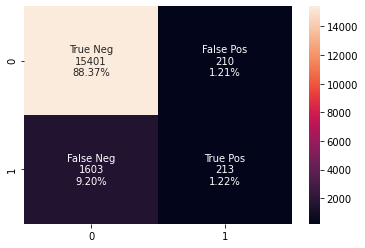

In [121]:
xgb_predictions = test_model.predict(valid_X)

xgb_cf_matrix = confusion_matrix(valid_y, xgb_predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in xgb_cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in xgb_cf_matrix.flatten()/np.sum(xgb_cf_matrix)]
labels = [f'{_1}\n{_2}\n{_3}' for _1, _2, _3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(xgb_cf_matrix, annot=labels, fmt='')

# Simulate model with the past

The goal of this section is to run the model through a few months of use with imaginary money and see how it performs

In [91]:
class MyMoney:
    """
    This class serves to manage the portfolio/money aspect of the simulation.
    """
    def __init__(self, starting_funds):
        self.funds = starting_funds
        self.portfolio = {}
        self.chunk_pct = .2
    
    def add_to_portfolio(self, symbol, amount, date_added):
        if symbol not in self.portfolio.keys():
            self.portfolio[symbol] = [amount, date_added]
            self.funds = self.funds - amount
        else:
            self.portfolio[symbol] = [self.portfolio[symbol][0]+ amount, date_added]
            self.funds = self.funds - amount

    def sell_from_portfolio(self, symbol, pct_change):
        self.funds += (self.portfolio[symbol][0] + (self.portfolio[symbol][0]*pct_change))
        print('SOLD!', symbol)
        self.portfolio.pop(symbol)

    def total_portfolio(self, _date):
        total_amount = self.funds
        _keys = list(self.portfolio.keys())
        if len(_keys) == 0:
            return self.funds
        for i in _keys:
            date_bought = self.portfolio[i][1]
            date_sold = _date
            temp = df[df['Symbol']==i]
            buy_price = float(temp[temp['Date_Only']==date_bought]['Open'])
            sell_price = float(temp[temp['Date_Only']==date_sold]['Open'])
            pct_change = (sell_price-buy_price)/buy_price
            total_amount+= self.portfolio[i][0]+ (self.portfolio[i][0]*pct_change)
        return total_amount
    
    def get_amount(self, _date):
        want_to_spend = .2 * self.total_portfolio(_date)
        if want_to_spend< self.funds:
            return want_to_spend
        elif self.funds < want_to_spend and self.funds != 0:
            return self.funds
        else:
            return False

In [106]:
class StockSimulator:
    def __init__(self, start_date, symbols, model):
        self._date = start_date
        self.end_date = date(2020, 9, 1)
        self.symbols = symbols
        self.money = MyMoney(1000)
        self._LOG = pd.DataFrame()
        self.TEMP_TRACKER_PRICE = []
        self.TEMP_TRACKER_DATE = []
        self.model = model
        self.input_symbols = ['Volume', 'Dividends', 'Stock Splits', 'Pct_Change', 'Three_Day_Movement', 'Five_Day_Movement']
    
    def collect_inputs(self): #SOMETHING WRONG HERE
        inputs = []
        for sym in self.symbols:
            temp = df[df['Symbol']==sym]
            temp = temp[temp['Date_Only']==self._date]
            temp = temp[self.input_symbols]
            inputs.append([sym,temp])
        return inputs

    def make_predictions(self, model_inputs):
        if model_inputs.empty:
            return False
        prediction = self.model.predict(model_inputs)
        if prediction != 0 and float(model_inputs['Pct_Change'])>0: 
            return True
        else:
            return False

    def transaction(self, symbol):
        amount = self.money.get_amount(self._date)
        if amount:
            print('Bought', symbol)
            self.money.add_to_portfolio(symbol, amount, self._date)

    def auto_sell(self):
        _keys = list(self.money.portfolio.keys())
        for i in _keys:
            if self.money.portfolio[i][1]+timedelta(days=2)<=self._date:
                if self._date in df['Date_Only'].unique():
                    date_bought = self.money.portfolio[i][1]
                    date_sold = self._date
                    temp = df[df['Symbol']==i]
                    buy_price = float(temp[temp['Date_Only']==date_bought]['Open'])
                    sell_price = float(temp[temp['Date_Only']==date_sold]['Open'])
                    change = (sell_price-buy_price)/buy_price
                    self.money.sell_from_portfolio(i, change)

    def RUN_SIM(self): #TODO this could use some serious cleanup for naming
        while self._date < self.end_date:
            if self._date in df['Date_Only'].unique():
                days_inputs = None
                days_inputs = self.collect_inputs()
                daily_predictions=[]
                for i in days_inputs:
                    daily_predictions.append([i[0], self.make_predictions(i[1])])
                for i in daily_predictions:
                    if i[1]:
                        self.transaction(i[0])
                self.auto_sell()
                print(self._date, self.money.total_portfolio(self._date))
                self.TEMP_TRACKER_PRICE.append(self.money.total_portfolio(self._date))
                self.TEMP_TRACKER_DATE.append(self._date)
            self._date  = self._date + timedelta(days=1)


In [122]:
sim = StockSimulator(date(2020, 1, 1), symbols, test_model)
print('Sim Starting...')
sim.RUN_SIM()

Sim Starting...
2020-01-02 1000
2020-01-03 1000
2020-01-06 1000
Bought PLUG
Bought CPRX
2020-01-07 1000.0
2020-01-08 998.5269086357948
SOLD! PLUG
SOLD! CPRX
2020-01-09 1031.7521902377973
Bought LK
2020-01-10 1031.7521902377973
SOLD! LK
2020-01-13 1037.9104686407088
Bought CGC
2020-01-14 1037.9104686407088
Bought CGC
Bought CRON
2020-01-15 1037.9104686407088
2020-01-16 1074.6787116750738
SOLD! CGC
SOLD! CRON
2020-01-17 1043.4849352216995
Bought BYND
2020-01-21 1043.4849352216995
Bought FCEL
2020-01-22 1069.211917783891
Bought CRON
SOLD! BYND
2020-01-23 1035.1611164299268
SOLD! FCEL
2020-01-24 1032.998877165255
SOLD! CRON
2020-01-27 1000.2041719047179
2020-01-28 1000.2041719047179
2020-01-29 1000.2041719047179
2020-01-30 1000.2041719047179
2020-01-31 1000.2041719047179
2020-02-03 1000.2041719047179
Bought TSLA
Bought NIO
2020-02-04 1000.2041719047179
Bought INO
Bought NIO
2020-02-05 986.6785613802915
SOLD! TSLA
2020-02-06 946.0745619112988
SOLD! NIO
SOLD! INO
2020-02-07 918.9229073339909

In [123]:
plot_df = pd.DataFrame()
plot_df['Y'] = sim.TEMP_TRACKER_PRICE
plot_df['X'] = sim.TEMP_TRACKER_DATE
fig = px.scatter(plot_df, x='X', y='Y')
fig.show()